In [1]:
#Imporing required libraries for our analysis
import pandas as pd
from pandas import DataFrame, Series
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#Reading the Avocado data set and assigning it to Avocado variable
Avocado = pd.read_csv("Avocado.csv")

In [3]:
#Viewing the data set
#We have 3650 rows and 13 columns in the data set.
Avocado

,Date,AveragePrice,Total.Volume,X4046,X4225,X4770,Total.Bags,Small.Bags,Large.Bags,XLarge.Bags,type,year,region
0,22/01/17,1.51,489345.23,18201.14,287008.11,58242.14,125893.84,114958.90,9387.36,1547.58,conventional,2017,Philadelphia
1,19/07/15,0.98,258559.32,167068.14,8930.71,11720.44,70840.03,62702.44,8131.55,6.04,conventional,2015,NewOrleansMobile
2,28/05/17,2.73,24852.33,10640.43,10979.17,8.75,3223.98,3201.30,22.68,0.00,organic,2017,SanFrancisco
3,28/05/17,2.09,5786.49,1322.11,165.26,6.12,4293.00,4070.95,222.05,0.00,organic,2017,Jacksonville
4,13/11/16,1.73,559978.64,64630.53,311687.85,28558.19,155102.07,153317.90,1348.06,436.11,conventional,2016,BaltimoreWashington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,06/03/16,0.97,159755.26,87362.97,20762.36,5969.90,45660.03,29901.71,15758.32,0.00,conventional,2016,Nashville
3646,21/02/16,1.64,9227.72,1.26,174.60,0.00,9051.86,9051.86,0.00,0.00,organic,2016,NorthernNewEngland
3647,03/05/15,1.37,912681.57,323883.65,380650.64,8951.77,199195.51,119498.18,79697.33,0.00,organic,2015,TotalUS
3648,17/07/16,1.39,20729.16,16079.93,30.30,0.00,4618.93,4578.93,40.00,0.00,organic,2016,Houston


In [4]:
#Deleting columns which are not significant for our analysis
del Avocado['X4046']
del Avocado['X4225']
del Avocado['X4770']

In [5]:
#Renaming some of the columns in the Avocado dataset
Avocado = Avocado.rename(columns = {"Total.Volume":"TotalVolume", "Total.Bags":"TotalBags", "Small.Bags":"SmallBags", "Large.Bags":"LargeBags", "XLarge.Bags":"XLargeBags"})

In [6]:
#Making sure the date column is in a proper date format
Avocado['Date'] = pd.to_datetime(Avocado['Date'])

In [7]:
#Viewing the cleaned data set.
Avocado

,Date,AveragePrice,TotalVolume,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,2017-01-22,1.51,489345.23,125893.84,114958.90,9387.36,1547.58,conventional,2017,Philadelphia
1,2015-07-19,0.98,258559.32,70840.03,62702.44,8131.55,6.04,conventional,2015,NewOrleansMobile
2,2017-05-28,2.73,24852.33,3223.98,3201.30,22.68,0.00,organic,2017,SanFrancisco
3,2017-05-28,2.09,5786.49,4293.00,4070.95,222.05,0.00,organic,2017,Jacksonville
4,2016-11-13,1.73,559978.64,155102.07,153317.90,1348.06,436.11,conventional,2016,BaltimoreWashington
...,...,...,...,...,...,...,...,...,...,...
3645,2016-06-03,0.97,159755.26,45660.03,29901.71,15758.32,0.00,conventional,2016,Nashville
3646,2016-02-21,1.64,9227.72,9051.86,9051.86,0.00,0.00,organic,2016,NorthernNewEngland
3647,2015-03-05,1.37,912681.57,199195.51,119498.18,79697.33,0.00,organic,2015,TotalUS
3648,2016-07-17,1.39,20729.16,4618.93,4578.93,40.00,0.00,organic,2016,Houston


In [8]:
#Checking if the data has any null values
Avocado.isnull().sum()

#The data doesn't have any null values.

Date            0
AveragePrice    0
TotalVolume     0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
year            0
region          0
dtype: int64

In [9]:
#Describing the numerical attributes of the data set
#describe() function gives us the mean, std, min, max, etc for all the numerical attributes of the data set

A = Avocado.describe()
A.to_csv('Describe.csv')
A

,AveragePrice,TotalVolume,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,3650.000000,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3650.000000,3650.000000
mean,1.406162,8.788627e+05,2.467042e+05,1.900849e+05,5.341642e+04,3202.857101,2016.165205
std,0.410361,3.670212e+06,1.033069e+06,7.896683e+05,2.483160e+05,17474.699362,0.941911
min,0.440000,4.199800e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.058395e+04,4.874777e+03,2.541003e+03,1.400625e+02,0.000000,2015.000000
50%,1.370000,1.040845e+05,3.925875e+04,2.521867e+04,2.566635e+03,0.000000,2016.000000
75%,1.660000,4.255153e+05,1.101856e+05,8.312443e+04,2.072805e+04,111.965000,2017.000000
max,3.040000,5.228870e+07,1.580470e+07,1.122805e+07,4.324231e+06,328589.090000,2018.000000


In [10]:
#To check the Average Price Range
AveragePriceRange = max(Avocado.AveragePrice) - min(Avocado.AveragePrice)
print(AveragePriceRange)

2.6


In [11]:
#Shows the two different types of avocado
Avocado.type.unique()

array(['conventional', 'organic'], dtype=object)

In [12]:
#Shows all the unique regions in the data set
Avocado.region.unique()

array(['Philadelphia', 'NewOrleansMobile', 'SanFrancisco', 'Jacksonville',
       'BaltimoreWashington', 'Roanoke', 'Seattle', 'NorthernNewEngland',
       'Albany', 'Midsouth', 'CincinnatiDayton', 'GrandRapids',
       'LasVegas', 'Chicago', 'SanDiego', 'California', 'Columbus',
       'Pittsburgh', 'Syracuse', 'Southeast', 'Plains', 'SouthCentral',
       'WestTexNewMexico', 'Charlotte', 'NewYork', 'Indianapolis',
       'Denver', 'Nashville', 'SouthCarolina', 'DallasFtWorth', 'Tampa',
       'LosAngeles', 'Sacramento', 'MiamiFtLauderdale', 'Detroit',
       'Boston', 'RaleighGreensboro', 'Houston', 'Orlando', 'GreatLakes',
       'HartfordSpringfield', 'RichmondNorfolk', 'West', 'Louisville',
       'Spokane', 'TotalUS', 'BuffaloRochester', 'PhoenixTucson', 'Boise',
       'Atlanta', 'StLouis', 'Portland', 'Northeast',
       'HarrisburgScranton'], dtype=object)

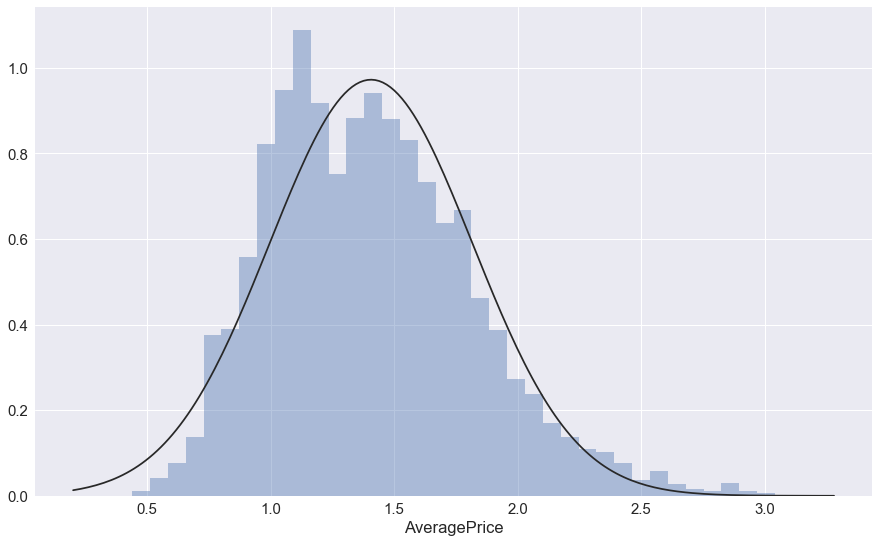

In [13]:
#The graph shows us the Distribution of AveragePrice

sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize = (15, 9))
sns.distplot(a = Avocado.AveragePrice, kde = False, fit = norm)

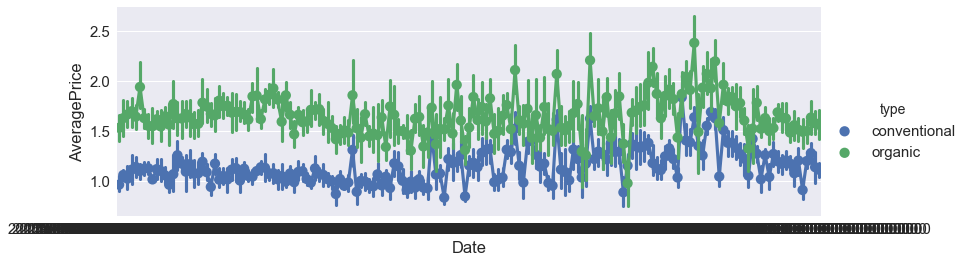

In [14]:
#This graph shows us the average price of both the type of Avocados
#We can see the the average price of organic avocado is higher than the conventional avocados.
sns.factorplot(x='Date', y='AveragePrice', data=Avocado, hue='type',aspect=3)

In [15]:
#Grouping data by Year and exporting the output in a new csv file
B = Avocado.groupby('year').mean()
B.to_csv('Group_by_Year.csv')
B

,AveragePrice,TotalVolume,TotalBags,SmallBags,LargeBags,XLargeBags
year,,,,,,
2015,1.386033,829481.489203,148056.857400,121858.928297,25165.563424,1032.365679
2016,1.320644,889880.636670,265507.730826,203939.174083,58090.819601,3477.737142
2017,1.514386,934585.156334,313227.684335,237299.109585,71166.537409,4762.036494
2018,1.363004,789762.695970,283286.076160,206412.808137,72712.563536,4160.704487


In [16]:
#I have grouped the data by Year and Type and have analyzed the TotalVolume attribute
#We can see that the Total Volume is increasing per year

#We do not have the entire data of 2018 so the TotalVolume for that year is decreasing 
#We can ignore the data of year 2018 for all our analysis as we do not have the entire data for that year

C = Avocado.groupby(["year", "type"],as_index=False)["TotalVolume"].sum()
C.to_csv('Group_by_year&type1.csv')
C

,year,type,TotalVolume
0,2015,conventional,8.977580e+08
1,2015,organic,1.798953e+07
2,2016,conventional,9.581726e+08
3,2016,organic,2.247582e+07
4,2017,conventional,1.068878e+09
5,2017,organic,3.486749e+07
6,2018,conventional,1.995094e+08
7,2018,organic,8.198220e+06


In [17]:
#Grouping by Year and then by the type to see the trend in the AveragePrice based on the type of Avocado and the year.
#We can see that the average price of organic avocado is much higher than the conventional avocados
#The conventional avocados price has increased for all the years
#The price of the organic avocados doesn't show any upward or downward trend

D = Avocado.groupby(["year", "type"],as_index=False)["AveragePrice"].mean()
D.to_csv('Group_by_year&type2.csv')
D

,year,type,AveragePrice
0,2015,conventional,1.069108
1,2015,organic,1.675494
2,2016,conventional,1.089965
3,2016,organic,1.573251
4,2017,conventional,1.289130
5,2017,organic,1.728119
6,2018,conventional,1.154427
7,2018,organic,1.570000


In [18]:
#I have grouped the data by year and type to see the TotalBags of Avocados consumed. 
#We can see that the consumption of both the type of Avocados has increased over the years.
#Conventional avocados consumption is higher than the organic avocados

E = Avocado.groupby(["year", "type"],as_index=False)["TotalBags"].sum()
E.to_csv('Group_by_year&type3.csv')
E

,year,type,TotalBags
0,2015,conventional,1.589667e+08
1,2015,organic,4.488096e+06
2,2016,conventional,2.818157e+08
3,2016,organic,1.077386e+07
4,2017,conventional,3.478751e+08
5,2017,organic,2.204675e+07
6,2018,conventional,6.893872e+07
7,2018,organic,5.565520e+06


In [19]:
#Here, we can analyze the average price of Avocados by region 
#I have sorted the output showing the regions with higher average price first
#We can see that the average price of avocados in region like SanFrancisco and New York is higher than the other cities

F = Avocado.groupby(["region"], as_index=False)["AveragePrice"].mean()
F = F.sort_values(["AveragePrice"], ascending = False)
F.to_csv('Group_by_region1.csv')
F

,region,AveragePrice
42,SanFrancisco,1.824167
17,HartfordSpringfield,1.792239
28,NewYork,1.733273
32,Philadelphia,1.662394
40,Sacramento,1.625652
31,Orlando,1.610000
7,Charlotte,1.586338
49,Syracuse,1.561733
4,Boston,1.556543
47,Spokane,1.555211


In [20]:
#Here, I grouped the data by region to analyze the total volume of avocados consumed per each region.

G = Avocado.groupby(["region"], as_index=False)["TotalVolume"].sum()
G = G.sort_values(["TotalVolume"], ascending = False)
G.to_csv('Group_by_region2.csv')
G

,region,TotalVolume
51,TotalUS,1.353111e+09
45,SouthCentral,2.204001e+08
6,California,2.026212e+08
52,West,1.743713e+08
29,Northeast,1.417621e+08
15,GreatLakes,1.267624e+08
22,LosAngeles,9.566135e+07
46,Southeast,8.866147e+07
25,Midsouth,7.966982e+07
35,Plains,5.186223e+07


In [21]:
#I have grouped the entire data by type of avocados
#We can see that the total volume and total bags of conventional avocados is much higher than the organic

H = Avocado.groupby(["type"], as_index=False)["TotalVolume", "TotalBags"].sum()
H = H.sort_values(["TotalVolume"], ascending = False)
H.to_csv('Group_by_type.csv')
H

,type,TotalVolume,TotalBags
0,conventional,3.124318e+09,8.575962e+08
1,organic,8.353106e+07,4.287422e+07
